#Gaussian bayes classifier

In this assignment we will use a Gaussian bayes classfier to classify our data points.

# Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report
from matplotlib import cm
from scipy.stats import norm
from sklearn.metrics import accuracy_score

# Load training data

Our data has 2D feature $x1, x2$. Data from the two classes are in $\texttt{class1_train}$ and $\texttt{class2_train}$ respectively. Each file has two columns corresponding to the 2D feature.

In [0]:
class1_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class1_train').to_numpy()
class2_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class2_train').to_numpy()

In [4]:
print(class1_train.shape)
print(class2_train.shape)

(160, 2)
(39, 2)


# Visualize training data
Generate 2D scatter plot of the training data. Plot the points from class 1 in red and the points from class 2 in blue.

In [5]:
x1, y1 = class1_train.T
x2, y2 = class2_train.T
print(x1.shape, y1.shape)

(160,) (160,)


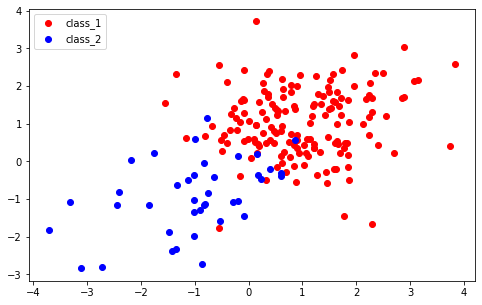

In [6]:
#fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots(figsize=(8,5))
#ax.scaptter(*class1_train.T, *class2_train.T)
ax.scatter(x1, y1, c='r', )
ax.scatter(x2, y2, c='b')
ax.legend(['class_1','class_2'])
plt.show()


# Maximum likelihood estimate of parameters

We will model the likelihood, $P(\mathbf{x}|C_1)$ and $P(\mathbf{x}|C_2)$ as $\mathcal{N}(\mathbf{\mu_1},\Sigma_1)$ and $\mathcal{N}(\mathbf{\mu_2},\Sigma_2)$ respectively. The prior probability of the classes are called, $P(C_1)=\pi_1$ and $P(C_2)=\pi_2$.

The maximum likelihood estimate of the parameters as follows:
\begin{align*}
\pi_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)}{N}\\
\mathbf{\mu_k} &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)\mathbf{x}^i}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\Sigma_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)(\mathbf{x}^i-\mathbf{\mu_k})(\mathbf{x}^i-\mathbf{\mu_k})^T}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\end{align*}

Here, $t^i$ is the target or class of $i^{th}$ sample. $\mathbb{1}(t^i=k)$ is 1 if $t^i=k$ and 0 otherwise.

Compute maximum likelihood values estimates of $\pi_1$, $\mu_1$, $\Sigma_1$ and $\pi_2$, $\mu_2$, $\Sigma_2$ 

Also print these values


In [0]:
a = [2,3,4,5]


In [7]:
num_1 = np.size(class1_train)
num_2 = np.size(class2_train)
N = num_1 + num_2
print('Total number of elements in both class is:', N)

Total number of elements in both class is: 398


In [8]:
Pi_1 = num_1/N
Pi_2 = num_2/N
print("P(C1)=", Pi_1, "P(C2)=", Pi_2)


P(C1)= 0.8040201005025126 P(C2)= 0.19597989949748743


In [9]:
µ1 = class1_train.mean(axis=0)
µ2 = class2_train.mean(axis=0)
print("µ1 = ", µ1, "µ2 =", µ2)

µ1 =  [0.96998989 1.02894917] µ2 = [-1.02482819 -0.91492055]


In [11]:
var1 = np.cov(class1_train.T)
var2 = np.cov(class2_train.T)
print("Sigma1 =", var1, '\n' "Sigma2 = ", var2)

Sigma1 = [[0.96127884 0.07824879]
 [0.07824879 0.82105102]] 
Sigma2 =  [[1.1978678  0.48182629]
 [0.48182629 0.93767199]]


# Visualize the likelihood
Now that you have the parameters, let us visualize how the likelihood looks like.

1. Use $\texttt{np.mgrid}$ to generate points uniformly spaced in -5 to 5 along 2 axes
1. Use $\texttt{multivariate_normal.pdf}$ to get compute the Gaussian likelihood for each class  
1. Use $\texttt{plot_surface}$ to plot the likelihood of each class.
1. Use $\texttt{contourf}$ to plot the likelihood of each class. 

You may find the code in the lecture notebook helpful.
 
For the plots, use $\texttt{cmap=cm.Reds}$ for class 1 and $\texttt{cmap=cm.Blues}$ for class 2. Use $\texttt{alpha=0.5}$ to overlay both plots together.

Text(0, 0.5, 'y')

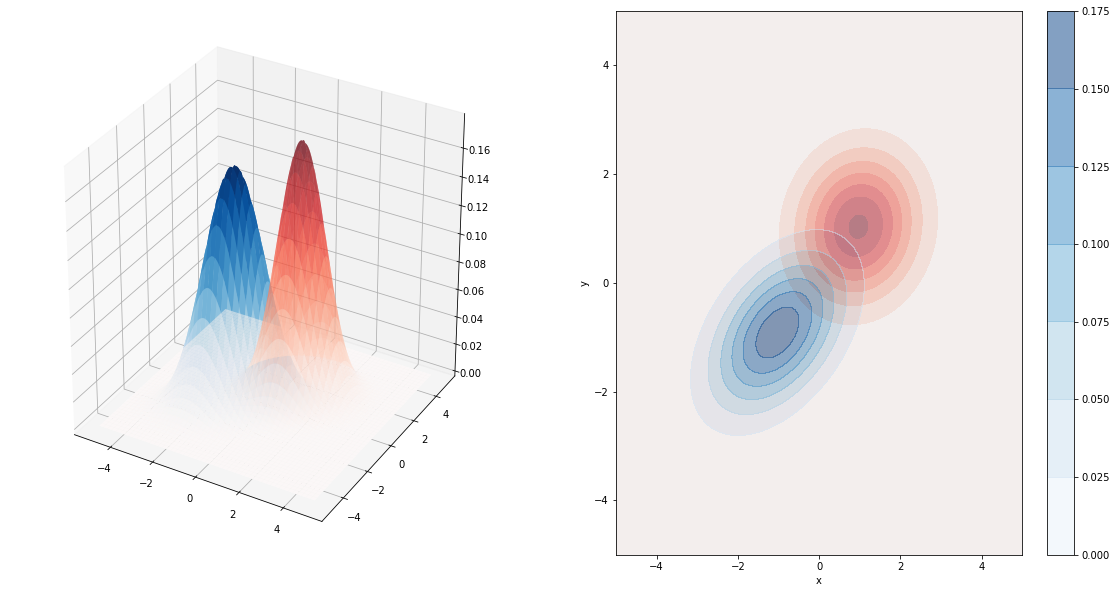

In [12]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = multivariate_normal(mean = µ1, cov = var1)
rv2 = multivariate_normal(mean = µ2, cov = var2)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x,y,rv1.pdf(pos), cmap=cm.Reds, alpha=0.5)
ax.plot_surface(x,y,rv2.pdf(pos), cmap=cm.Blues)
#contour

plt.subplot(122)
plt.contourf(x, y, rv1.pdf(pos), cmap=cm.Reds)
plt.contourf(x, y, rv2.pdf(pos), cmap=cm.Blues, alpha=0.5)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#ax.contourf(x,y,rv2.pdf(pos), cmap=cm.Reds)

#Visualize the posterior
Use the prior and the likelihood you've computed to obtain the posterior distribution for each class.

Like in the case of the likelihood above, make same similar surface and contour plots for the posterior.

In [0]:
# posterior1 = (likelihood1 * prior1) / ((likelihood1 * prior1) + (likelihood2 * prior2))

In [0]:
likelihood1 = rv1.pdf(pos)
likelihood2 = rv2.pdf(pos)
# rv1_p.shape

In [0]:
pd_1 = (likelihood1*Pi_1)/((likelihood1*Pi_1)+(likelihood2*Pi_2))
pd_2 = (likelihood2*Pi_2)/((likelihood1*Pi_1)+(likelihood2*Pi_2))

Text(0, 0.5, 'y')

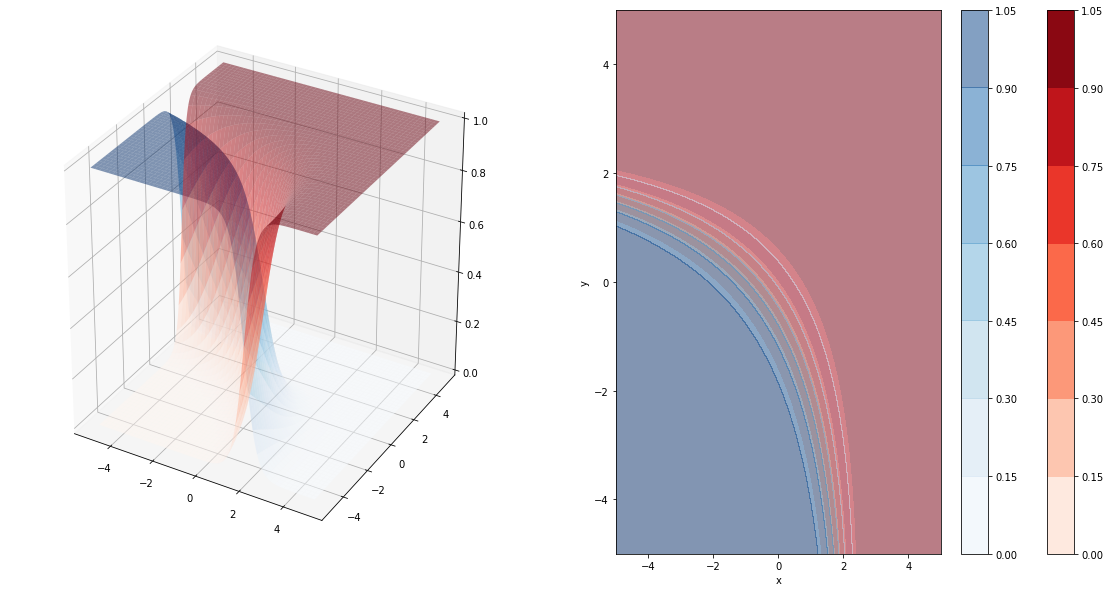

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x,y,pd_1, cmap=cm.Reds,alpha=0.5)
ax.plot_surface(x,y,pd_2, cmap=cm.Blues, alpha=0.5)

#contour

plt.subplot(122)
plt.contourf(x, y, pd_1, cmap=cm.Reds)
plt.colorbar()
plt.contourf(x, y, pd_2, cmap=cm.Blues, alpha=0.5)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

# Decision boundary
1. Decision boundary can be obtained by $P(C_2|x)>P(C_1|x)$ in python. Use $\texttt{contourf}$ to plot the decision boundary. Use $\texttt{cmap=cm.Blues}$ and $\texttt{alpha=0.5}$
1. Also overlay the scatter plot of train data points from the 2 classes on the same plot. Use red color for class 1 and blue color for class 2 

Text(0, 0.5, 'y')

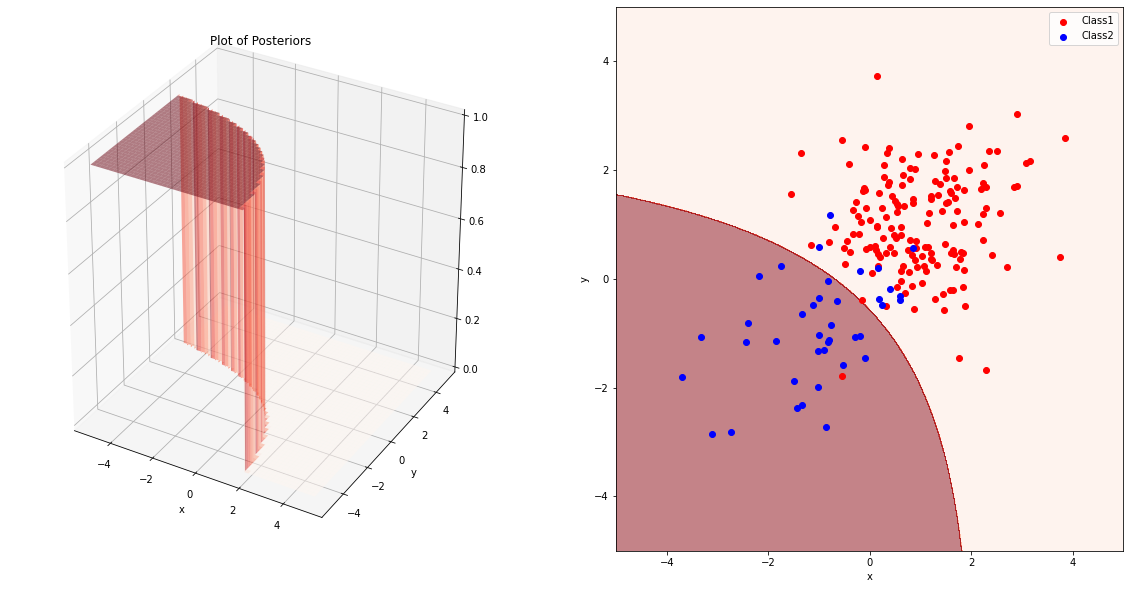

In [16]:
decision = pd_2 > pd_1
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d') # add 3d projjection
plt.title("Plot of Posteriors")
plt.xlabel('x')
plt.ylabel('y')
# to plot 3d plot
ax.plot_surface(x,y,decision, cmap=cm.Reds, alpha = 0.5)
plt.subplot(122)
# draw contour plot
plt.contourf(x, y, decision, cmap=cm.Reds, alpha = 0.5)
plt.scatter(x1, y1, c="red", label='Class1')
plt.scatter(x2, y2, c="blue", label='Class2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Test Data
Now let's use our trained model to classify test data points

1. $\texttt{test_data}$ contains the $x1,x2$ features of different data points
1. $\texttt{test_label}$ contains the true class of the data points. 0 means class 1. 1 means class 2.  
1. Classify the test points based on whichever class has higher posterior probability for each data point
1. Use $\texttt{classification_report}$ to test the classification performance

In [0]:
test = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/test').to_numpy()
test_data, test_label = test[:,:2], test[:,2]

In [18]:
test_data.shape

(49, 2)

In [0]:
c,d = test_data.T

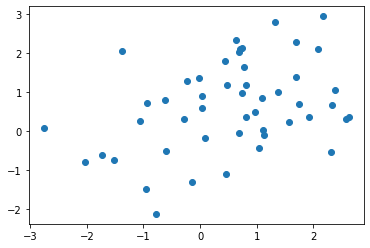

In [0]:
plt.scatter(c, d)
plt.show()

In [0]:
# posterior1 = (likelihood1 * prior1) / ((likelihood1 * prior1) + (likelihood2 * prior2))

In [0]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = np.mean(data)
	sigma = np.std(data)
	print(mu, sigma)
	# fit distribution
	dist = multivariate_normal(mu, sigma)
	return dist

In [0]:
# sort data into classes
Xy0 = test_data[test_label == 0]
Xy1 = test_data[test_label == 1]
print(Xy0.shape, Xy1.shape)

(40, 2) (9, 2)


In [0]:
# calculate priors
priory0 = len(Xy0) / len(test_data)
priory1 = len(Xy1) / len(test_data)
print(priory0, priory1)

0.8163265306122449 0.1836734693877551


In [0]:
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

0.9284206205582993 0.9904964284245776
0.8686964442934716 1.0033731713102978
-1.2112897828426874 0.7867255945323278
-0.3369064547987153 1.1523697612346346


In [0]:
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

In [0]:
# classify one example
Xsample, ysample = test_data[0], test_label[0]
py0 = probability(Xsample, priory0, distX1y0, distX2y0)
py1 = probability(Xsample, priory1, distX1y1, distX2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

P(y=0 | [1.37207512 1.00087579]) = 11.698
P(y=1 | [1.37207512 1.00087579]) = 0.020
Truth: y=0


In [24]:
likelihood1_test = rv1.pdf(test_data)
likelihood2_test = rv2.pdf(test_data)

posterior1_test = (likelihood1_test * Pi_1) / ((likelihood1_test * Pi_1) + (likelihood2_test * Pi_2))
posterior2_test = (likelihood2_test * Pi_2) / ((likelihood1_test * Pi_1) + (likelihood2_test * Pi_2))

pred = []

decision_test = posterior2_test >= posterior1_test

for i in decision_test:
  if i == True:
    pred.append(1)
  else:
    pred.append(0)

pred = np.array(pred)
pred.shape
print(classification_report(test_label,pred))
print("Accuracy Score:{:2f}%".format(accuracy_score(test_label,pred)*100))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49

Accuracy Score:87.755102%
